 "GDP DATASET"


The task is to apply machine learning techniques such as linear and logistic regression,decision tree classifier etc on the gdp dataset of different countries and their features to find meaningful results.



In [16]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


df = pd.read_csv('countries of the world.csv', decimal=',')
data=df.copy()
data=data.drop(['GDP ($ per capita)'], axis=1)
data['Phones (per 1000)'].fillna((df['Phones (per 1000)'].mean()), inplace=True)

X=data.iloc[:,9]
X=X.to_frame()

df['GDP ($ per capita)'].fillna((df['GDP ($ per capita)'].mean()), inplace=True)
Y=df.iloc[:, 8]
Y=Y.to_frame()


In [2]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    227 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

In [6]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,227.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10026.881258,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5600.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


A few of the histograms are standardized ad some are not as some of them are left tailed and some of them are right tailed.
This data will be standardized further in to the project using standard scalar.

# Linear Regression


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In the above cell we have split the dataset into the training dataset and test dataset by factor of 0.2 and applied linear regression.

In [42]:
print('coefficent(b1):' , regressor.coef_)

print('intercept(b0):' , regressor.intercept_)

coefficent(b1): [[36.86990959]]
intercept(b0): [800.37527944]


In [43]:
Y_pred = regressor.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error , r2_score
print("mean squared error: {}".format(mean_squared_error(Y_test,Y_pred)))
print("r2 score: {}".format(r2_score(Y_test,Y_pred)))
print("mean absolute error:",np.sqrt(metrics.mean_absolute_error(Y_test, Y_pred)))
a=" {}".format(r2_score(Y_test,Y_pred))


mean squared error: 20405009.54293776
r2 score: 0.7934916056116968
mean absolute error: 54.64425982741742


This graph shows the blue line as the regression line and the red dots depict the data points.We can see that most of the points are close to the regression line which shows that the model has fit on the data correctly.


Text(0,0.5,'gdp')

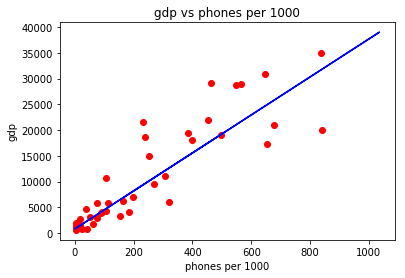

In [45]:
print("This graph shows the blue line as the regression line and the red dots depict the data points.We can see that most of the points are close to the regression line which shows that the model has fit on the data correctly.")
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title("gdp vs phones per 1000")
plt.xlabel("phones per 1000")
plt.ylabel("gdp")


# Multiple Linear Regression

In [46]:
data['Phones (per 1000)'].fillna((df['Phones (per 1000)'].mean()), inplace=True)
data['Industry'].fillna((df['Industry'].mean()), inplace=True)
data['Agriculture'].fillna((df['Agriculture'].mean()), inplace=True)
data['Literacy (%)'].fillna((df['Literacy (%)'].mean()), inplace=True)
data['Other (%)'].fillna((df['Other (%)'].mean()), inplace=True)

X1=data.iloc[:,[8,9,16,17,12]]


df['GDP ($ per capita)'].fillna((df['GDP ($ per capita)'].mean()), inplace=True)
Y_one=df.iloc[:, 8]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)
Y1=sc.fit_transform(Y_one.values.reshape(-1,1))



X1

array([[-2.48100371, -1.03279643,  1.61913212, -0.32114937,  0.37493797],
       [ 0.19395989, -0.73120009,  0.57341694, -0.71214481, -0.44582701],
       [-0.68003812, -0.70059693, -0.35218232,  2.38574214,  0.92876723],
       ...,
       [-1.72883573, -0.88199826, -0.11195045,  1.42329182,  0.9568329 ],
       [-0.11856061, -1.01062023,  0.48862922,  0.05480778,  0.70237081],
       [ 0.41643211, -0.92812476,  0.19893785, -0.29859194,  0.60507648]])

In [47]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2,random_state=1)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1_train , Y1_train)
print('coefficent\n' , regressor.coef_)

print('intercept' , regressor.intercept_)


Y1_pred = regressor.predict(X1_test)



coefficent
 [[ 0.01203279  0.75528761 -0.13167355  0.0213612   0.07022753]]
intercept [-0.02084117]


In [48]:

from sklearn.metrics import mean_squared_error , r2_score
print("mean squared error: {}".format(mean_squared_error(Y1_test,Y1_pred)))
print("r2 score: {}".format(r2_score(Y1_test,Y1_pred)))
print("Mean absolute error:",np.sqrt(metrics.mean_absolute_error(Y1_test, Y1_pred)))
b=" {}".format(r2_score(Y1_test,Y1_pred))


mean squared error: 0.1806985942396776
r2 score: 0.8169498843946732
Mean absolute error: 0.5672988419560061


# Random Forest Regressor

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)

In [50]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train , Y_train)
Y_pred = regressor.predict(X_test)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
from sklearn.metrics import mean_squared_error , r2_score
print("mean squared error: {}".format(mean_squared_error(Y_test,Y_pred)))
print("r2 score: {}".format(r2_score(Y_test,Y_pred)))
print("Mean absolute error:",np.sqrt(metrics.mean_absolute_error(Y_test, Y_pred)))
c=" {}".format(r2_score(Y_test,Y_pred))

mean squared error: 24611840.81051414
r2 score: 0.750916473818613
Mean absolute error: 56.96351286681225


# Support Vector Regression

In [53]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [55]:
from sklearn.metrics import mean_squared_error , r2_score
print("mean squared error: {}".format(mean_squared_error(Y_test,Y_pred)))
print("r2 score: {}".format(r2_score(Y_test,Y_pred)))
print("Mean absolute error:",np.sqrt(metrics.mean_absolute_error(Y_test, Y_pred)))
d=" {}".format(r2_score(Y_test,Y_pred))

mean squared error: 117570511.81175688
r2 score: -0.18986945683934198
Mean absolute error: 88.07761877915097


# Decision Tree Regression

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)

In [57]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error , r2_score
print("mean squared error: {}".format(mean_squared_error(Y_test,Y_pred)))
print("r2 score: {}".format(r2_score(Y_test,Y_pred)))
print("Mean absolute error:",np.sqrt(metrics.mean_absolute_error(Y_test, Y_pred)))
e=" {}".format(r2_score(Y_test,Y_pred))

mean squared error: 41454850.223728836
r2 score: 0.5804572136417969
Mean absolute error: 64.48037930348426


# Polynomial Regression

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
Xtrain_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(Xtrain_poly, Y_train)
regressor2 = LinearRegression()
regressor2.fit(Xtrain_poly, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
print("value for gdp for 45.4 phones is 2900")
print(regressor.predict([[45.4]]))

# Predicting a new result with Polynomial Regression
print(regressor2.predict(poly_reg.fit_transform([[45.4]])))
print("so it is clear that linear regression is much suited rather than polynomial regression")

value for gdp for 45.4 phones is 2900
[[2474.2691749]]
[[2170.72788287]]
so it is clear that linear regression is much suited rather than polynomial regression


# Final table

In [61]:
print("R2 score for the following regressions are")
print("simple linear regression:",a)
print("multiple linear regression:",b)
print("random forest regressor:",c)
print("support vector regression:",d)
print("decision tree regression:",e)

R2 score for the following regressions are
simple linear regression:  0.7934916056116968
multiple linear regression:  0.8169498843946732
random forest regressor:  0.750916473818613
support vector regression:  -0.18986945683934198
decision tree regression:  0.5804572136417969
